In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import networkx as nx

In [2]:
pth_in = os.path.join('..', 'data')
pth_data = os.path.join(pth_in, 'aliia')
pth_reg = os.path.join(pth_in, 'scenic')
# pth_out = os.path.join('..', 'figures')

In [7]:
adata = sc.read_h5ad(os.path.join(pth_data, 'e8_placodes.h5ad'))
regs = pd.read_csv(os.path.join(pth_reg, 'regulons.gmt'), header = None)
adj = pd.DataFrame(columns = adata.var_names)
src = regs[0].str[:-3]; tgt = regs[4].str[1:].str.split('\t')
for i in src.index: adj.loc[src.loc[i], tgt.loc[i]] = 1
adj = adj.fillna(0); adj

/tmp/ipykernel_1588418/1774459100.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  adj = adj.fillna(0); adj


,1700034P13Rik,1700120C14Rik,2610035D17Rik,2810403D21Rik,3830417A13Rik,4930414N06Rik,4930447N08Rik,4930511M06Rik,4930512H18Rik,4933424G05Rik,...,Xaf1,Xist,Xlr3a,Zc3hav1,Zcchc7,Zfp13,Zfp652os,Zfp982,Zfpm2,Znrf3
Ahr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arid5b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Atf3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bach2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sox9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tead1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tfap2b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tfap2c,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
clus_dict = adata.var.cluster_annotations.to_dict()
adj.index = adj.index.map(clus_dict)
adj.columns = adj.columns.map(clus_dict)
adj

,Otic,Otic,Otic,Otic,Epibranchial,Otic,Epibranchial,Epibranchial,Adenohypophyseal,Adenohypophyseal,...,Otic,Epibranchial,Trigeminal,Epibranchial,Trigeminal,Epibranchial,Otic,Trigeminal,Epibranchial,Otic
Trigeminal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Epibranchial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Epibranchial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Epibranchial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Otic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Otic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigeminal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigeminal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Trigeminal,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Text(0.5, 1.0, 'SCENIC GRN (E8)')

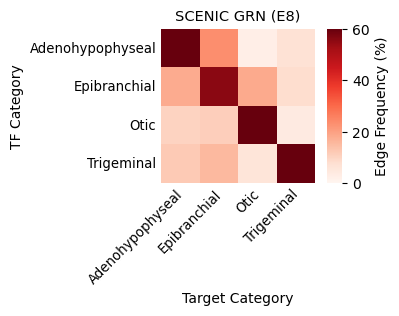

In [131]:
f = lambda df: (df.reset_index()
                .groupby('index', observed = True)
                .sum())

df = f(f(adj).T).T
df = df.div(df.sum(axis = 0), axis = 1)
df = df.div(df.sum(axis = 1), axis = 0)
df = df * 100

df.index = df.index.rename('TF Category')
df.columns = df.columns.rename('Target Category')

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (3, 2))
sns.heatmap(df,
            ax = ax,
            cmap = 'Reds',
            vmin = 0,
            vmax = 60,
            square = True,
            cbar_kws = {
                'aspect' : 10,
                'label' : 'Edge Frequency (%)'})

ax.tick_params('both', size = 0, labelsize = 9.5)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 45,
                   rotation_mode = 'anchor',
                   ha = 'right', va = 'center')
ax.tick_params('x', pad = 6.5)

ax.set_title('SCENIC GRN (E8)', size = 10.5)

In [ ]:
# import matplotlib.pyplot as plt

# ix = hubs_.index
# A = adj.loc[ix, ix]
# np.fill_diagonal(A.values, 0)
# msk = ((A.sum(axis = 0) + A.sum(axis = 1)) > 2)
# A = A.loc[msk, msk]
# G = nx.from_pandas_adjacency(A, create_using = nx.DiGraph)

# pos = nx.kamada_kawai_layout(G)

# # pos['Foxo1'][0] -= .025

# cats = adata.obs['cluster_annotations'].cat.categories
# colors = adata.uns['cluster_annotations_colors']
# c = hubs_.loc[A.index, 1].apply(lambda x: colors[cats.get_loc(x)])

# s = 100 * A.index.str.len()

# fig, ax = plt.subplots(1, 1, figsize = (10, 8))
# nx.draw_networkx_nodes(G, pos,
#                        node_size = s,
#                        node_color = c,
#                        alpha = .7,
#                        linewidths = 0,
#                        ax = ax)
# nx.draw_networkx_edges(G, pos,
#                        node_size = s,
#                        alpha = .2,
#                        arrowstyle = '-',
#                        ax = ax)
# texts = nx.draw_networkx_labels(G, pos,
#                                 font_size = 7,
#                                 ax = ax)
# for t in texts.values():
#     t.set_fontstyle('italic')
# ax.set_axis_off()
# plt.show()